In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-06-28 14:08:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  3.84MB/s    in 16s     

2021-06-28 14:08:28 (4.29 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [6]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [7]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir,'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='binary'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='binary'
    )

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
model.fit(
     train_generator,
     steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
     epochs=20, # tambahkan eposchs jika akurasi model belum optimal
     validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
     validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
     verbose=2
)

Epoch 1/20
25/25 - 8s - loss: 0.7097 - accuracy: 0.5000 - val_loss: 0.6788 - val_accuracy: 0.6500
Epoch 2/20
25/25 - 7s - loss: 0.6949 - accuracy: 0.5400 - val_loss: 0.6559 - val_accuracy: 0.6500
Epoch 3/20
25/25 - 7s - loss: 0.6144 - accuracy: 0.7000 - val_loss: 0.4719 - val_accuracy: 0.8000
Epoch 4/20
25/25 - 7s - loss: 0.7738 - accuracy: 0.5400 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 7s - loss: 0.6772 - accuracy: 0.5700 - val_loss: 0.6362 - val_accuracy: 0.8000
Epoch 6/20
25/25 - 6s - loss: 0.6635 - accuracy: 0.5800 - val_loss: 0.5734 - val_accuracy: 0.7000
Epoch 7/20
25/25 - 7s - loss: 0.5969 - accuracy: 0.7900 - val_loss: 0.4945 - val_accuracy: 0.7500
Epoch 8/20
25/25 - 7s - loss: 0.7029 - accuracy: 0.6200 - val_loss: 0.5962 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 7s - loss: 0.5913 - accuracy: 0.7300 - val_loss: 0.6966 - val_accuracy: 0.6000
Epoch 10/20
25/25 - 7s - loss: 0.6107 - accuracy: 0.7800 - val_loss: 0.5758 - val_accuracy: 0.6000
Epoch 11/20
25/25 -

Saving WhatsApp Image 2021-06-27 at 00.19.02.jpeg to WhatsApp Image 2021-06-27 at 00.19.02.jpeg
WhatsApp Image 2021-06-27 at 00.19.02.jpeg
clean


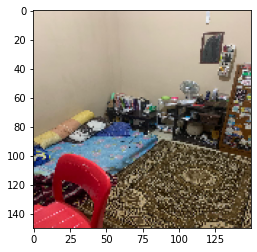

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img=image.load_img(path, target_size=(150,150))
    imgplot=plt.imshow(img)
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes==0:
        print('clean')

    else:
        print('messy')